In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy import stats
from matplotlib import pyplot
from scipy.stats import spearmanr

import warnings
warnings.filterwarnings("ignore")


import seaborn as sns

In [2]:
import matplotlib
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath}')

import matplotlib.font_manager as fm


fontSize=12
fontSizeSmall=10
labelSize=8


machine_precision=1e-6



SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

BIGGEST_SIZE = 18
# plt.rc('font', size=SMALL_SIZE, family='sans-serif', serif='Arial')          # controls default text sizes
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE, titleweight='bold')     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE, labelweight='bold')    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('text')


In [3]:
laml = [1e-30,100e-30,1e-20,1e-10,1e-5,.01,.05,.06,.0650,.0675,.07,0.08,0.1,0.13,0.15,0.18,0.2,0.5,1.0,5.0,10.0]
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error as mape


import matplotlib.font_manager as fm
 

import matplotlib.patches as mpatches

In [4]:
sp_list_provided = ["C","E","M","P","S","T"]

random_state = None
cv_splitsl = [3,5]

In [5]:
xshow = laml
xstr =  [str(x) for x in xshow[4:]]
ary = ['%.e' % x for x in xshow[:4]]
ary.append(xstr)
xf = list(pd.DataFrame(ary)[0].explode().values)

In [6]:
crossdf = pd.read_pickle("WH-REL-analysis.pkl")
crosslindf = pd.read_pickle("sigma-REL-analysis.pkl") 

In [7]:
best =  [] 
for cv in cv_splitsl:
    cf = crossdf[crossdf["k-fold"]==cv]
    for species in range(6):
        sp = cf[cf["sp"]==species]
        best.append([species,cv,sp.T[sp["nnseagg"].idxmax()]["nnseagg"],sp.T[sp["nnseagg"].idxmax()]["lambda"]])


In [9]:
bestlin =  [] 
for cv in cv_splitsl:
    cf = crosslindf[crosslindf["k-fold"]==cv]
    for species in range(6):
        sp = cf[cf["sp"]==species]
        bestlin.append([species,cv,sp.T[sp["nnseagg"].idxmax()]["nnseagg"],sp.T[sp["nnseagg"].idxmax()]["lambda"]])

    

In [10]:
bestwhdf = pd.DataFrame(best)
bestlindf = pd.DataFrame(bestlin)

In [11]:
bestwhdf

,0,1,2,3
0,0,3,0.465206,5.000000e-01
1,1,3,0.476713,1.000000e+00
2,2,3,0.691205,1.800000e-01
3,3,3,0.583562,1.000000e-30
4,4,3,0.496839,2.000000e-01
5,5,3,0.729629,2.000000e-01
6,0,5,0.490884,1.000000e+00
7,1,5,0.477492,1.000000e+00
8,2,5,0.698475,5.000000e-02
9,3,5,0.572886,1.000000e-30


In [10]:
bestwhdf.head(2)
data1 = bestwhdf[bestwhdf[1]==3][2]
data2 = bestlindf[bestlindf[1]==3][2]


colors1 = sns.color_palette("summer").as_hex()
pcol1 = colors1[0]
colors2 = sns.color_palette("flare").as_hex()
pcol2 = colors2[3]


sampper = ["Compressive Sensing","$l1$-regularised regression"] 
colors = [pcol2,pcol1]

data = [data1,data2]

In [11]:
h = pd.DataFrame(data1)
h["lin"] = data2

h = h.rename(columns={2:"wh"})

print("means=" ,h["wh"].mean(),h["lin"].mean())
h.index = np.arange(0,6,1)

def statistic(x, y, axis):

    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

statistic(h["wh"],h["lin"],0)
from scipy import stats 
res = stats.permutation_test((h["wh"], h["lin"]), statistic, vectorized=True,

                       n_resamples=np.inf, alternative='greater',permutation_type='samples')

print("statistic= ",res.statistic)

print("p-value = ",res.pvalue)
#res.null_distribution

def stars(p):
   if p < 0.0001:
       return "****"
   elif (p < 0.001):
       return "***"
   elif (p < 0.01):
       return "**"
   elif (p < 0.05):
       return "*"
   else:
       return "ns"

    
from scipy.stats import mannwhitneyu,wilcoxon,kruskal,brunnermunzel
w, p2= wilcoxon(h["wh"].values, h["lin"].values, alternative='greater')
alpha = 0.05
if p2 > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
print("Wilcoxon stat = ",w,p2)

means= 0.5738588617414145 0.5470161482527321
statistic=  0.02684271348868239
p-value =  0.046875
Different distribution (reject H0)
Wilcoxon stat =  19.0 0.046875


In [12]:
obs_sp = []
pred_sp = []
for sp in range(6):
    sp3 = crossdf[crossdf["sp"]==sp]
    cv3 = sp3[sp3["k-fold"]==3]
    yobs =  cv3[cv3["lambda"]==bestwhdf.iloc[sp][3]]["testact"].values[0]
    obs_sp.append(yobs)
    ypred =  cv3[cv3["lambda"]==bestwhdf.iloc[sp][3]]["testpred"].values[0]
    pred_sp.append(ypred)
    rval2 = r2_score(yobs,ypred)
    gop2 = 1/(2-rval2)
    #plt.scatter(yobs,ypred,color="red")

In [13]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [14]:
colorlist = ["magenta","deepskyblue","green","darkorange","dimgrey"]

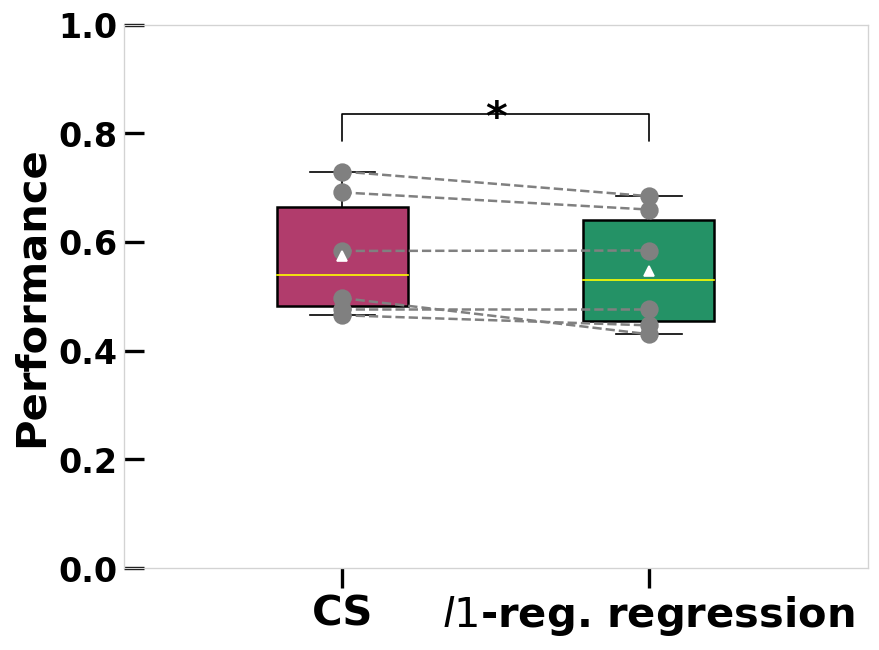

In [15]:

sampper = ["CS","$l1$-reg. regression"] 

fig, ax = plt.subplots(figsize=(8,6),dpi=120)
meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"white"}
box_dict = ax.boxplot(data, patch_artist=True,  showmeans=True,meanprops=meanprops,medianprops=dict(color="yellow"),positions=[0.5,1.2],widths=0.3)
for item in ['boxes']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, edgecolor="k",facecolor=color,linewidth=1.5)
for item in ['fliers']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color,linewidth=1)
# whiskers and caps have to be treated separately since there are two of each for each plot
for item in ['whiskers', 'caps']:
    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
        plt.setp(sub_items, color="k",linewidth=1)
plt.ylim(-0.0,1);
gs_font2 = fm.FontProperties(size=25, weight='bold')
plt.ylabel("Performance",font_properties=gs_font2);
 
gs_font4 = fm.FontProperties(size=20, weight='bold')

plt.yticks(fontproperties=gs_font4,rotation=0,color="grey")
gs_font3 = fm.FontProperties(size=25, weight='bold')
plt.xticks([0.5,1.2],sampper,rotation=0,color="grey",fontproperties=gs_font3)
ax.tick_params(axis="x",direction='out', length=12, width=2, colors='black',
              grid_color='lightgray', grid_alpha=0.9)
ax.tick_params(axis="y",direction='in', length=12, width=2, colors='black',
              grid_color='lightgray', grid_alpha=0.9) 
ticklabelcolor = 'lightgrey'
#plt.grid(linestyle=':', linewidth=1, color='grey')    
ax.spines['top'].set_color(ticklabelcolor)
ax.spines['bottom'].set_color(ticklabelcolor)
ax.spines['left'].set_color(ticklabelcolor)
ax.spines['right'].set_color(ticklabelcolor)
listpp = h[["wh","lin"]].values
list2 = [0.5,1.2]
for i in range(len(listpp)):
    plt.plot(list2,listpp[i],ls="dashed",color="grey",marker="o",markersize=10)
y_max = np.max(np.concatenate((h["wh"].values,h["lin"].values)))
y_min = np.min(np.concatenate((h["wh"].values,h["lin"].values)))
ax.annotate("", xy=(0.5, y_max+0.05), xycoords='data',
           xytext=(1.2, y_max+0.05), textcoords='data',
           arrowprops=dict(arrowstyle="-", ec="k",
                           connectionstyle="bar,fraction=0.1"))
ax.text(.85, y_max + abs(y_max - y_min)*0.325, stars(res.pvalue),
       horizontalalignment='center',
       verticalalignment='center',fontproperties=gs_font2);
#plt.savefig("will-rel-abun-boxplots-compare.svg")

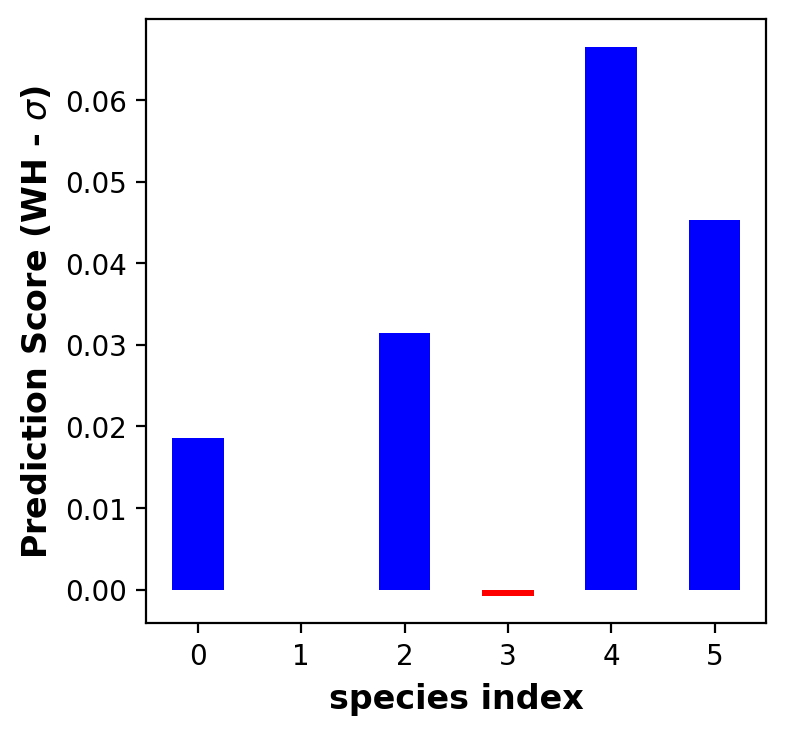

In [16]:
plt.figure(figsize=(4,4),dpi=200)
df1 = pd.DataFrame(h["wh"]-h["lin"])
df1['positive'] = df1[0] > 0
x = df1.index
df1[0].plot(kind="bar", rot=0,color=df1.positive.map({True: 'b', False: 'r'}));
plt.ylabel("Prediction Score (WH - $\sigma$)");
plt.xlabel("species index",rotation=0);
#plt.savefig("will-sp.png")

In [17]:
df1.to_pickle("ss-sp-v3.pkl")

In [18]:
slope, intercept,r_value, p_value, std_err = stats.linregress(flatten(obs_sp),flatten(pred_sp))
print("slope, intercept, r2 = ",slope,intercept,r_value**2)

x = np.linspace(0,1,1000)
y = slope*x + intercept

x45 = np.linspace(0,1,1000)
y45 = x45

slope, intercept, r2 =  0.5636080925256364 0.11907827200913268 0.5380815313767939


In [19]:
pd.to_pickle(h,"ss-v3-per.pkl")

In [20]:
datawill = [flatten(obs_sp),flatten(pred_sp)]
pd.to_pickle(datawill,"ss-v3-cvabun.pkl")

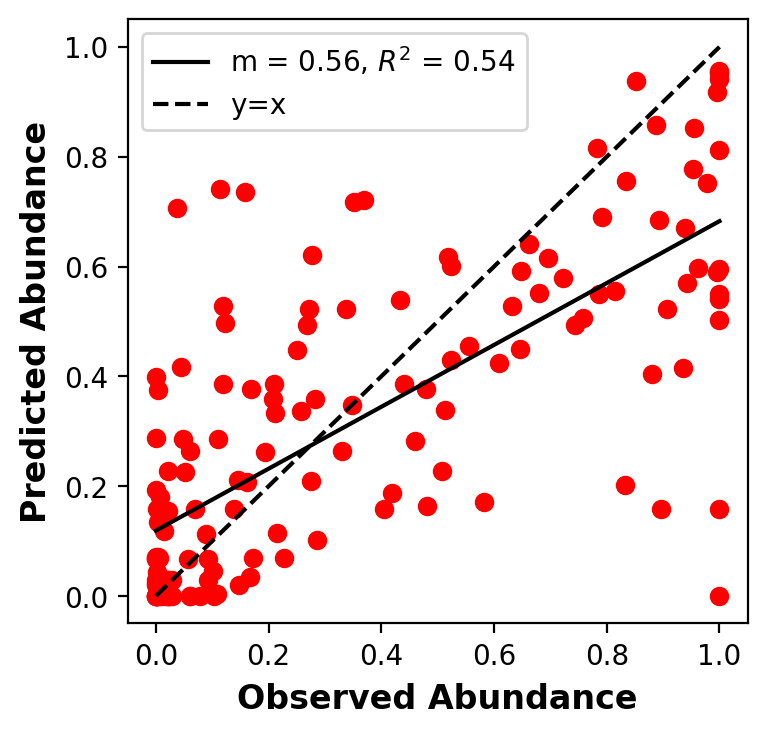

In [21]:
plt.figure(figsize=(4,4),dpi=200)
plt.scatter(flatten(obs_sp),flatten(pred_sp),color="red");
plt.xlabel("Observed Abundance");
plt.ylabel("Predicted Abundance");
plt.plot(x,y,"black",label="m = " +str(np.round(slope,2))+", " +"$R^2$" +" = "+ str(np.round(r_value**2,2)))
plt.plot(x45,y45,"black",ls="dashed",label="y=x");
plt.legend();

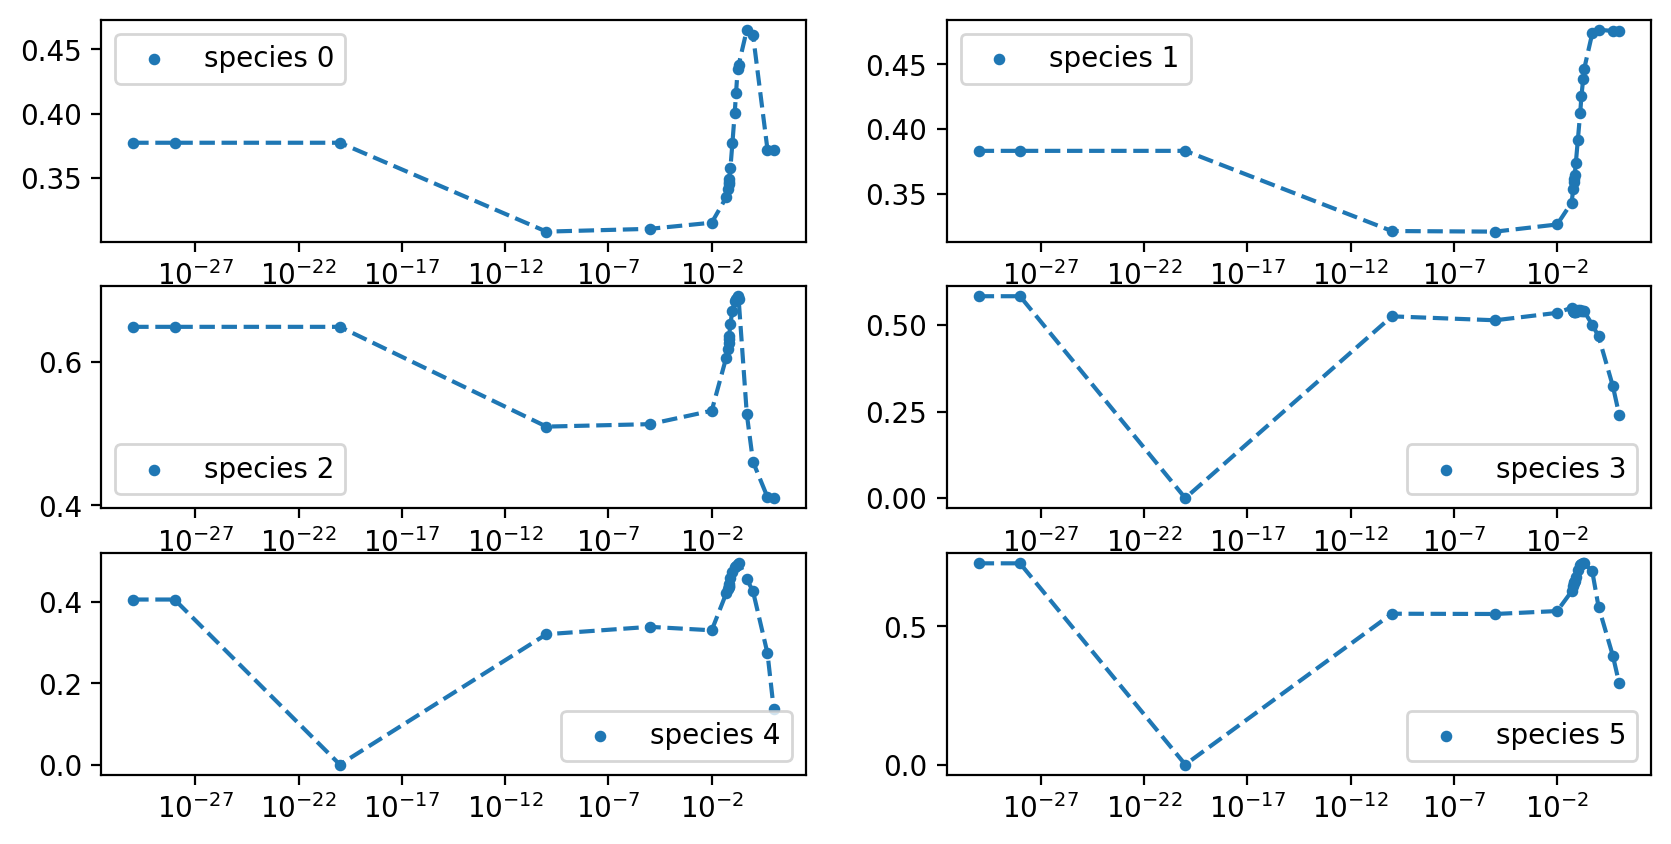

In [22]:
fig,ax = plt.subplots(3,2,figsize=(10,5),dpi=200)

for species in range(6):
    plt.subplot(3,2,species+1)
    spper = crossdf[crossdf["sp"]==species]
    kdf = spper[spper["k-fold"]==3]
    plt.scatter(kdf["lambda"],kdf["nnseagg"],s=10,label="species " + str(species))
    plt.plot(kdf["lambda"],kdf["nnseagg"],ls="dashed")
    plt.legend()
    plt.xscale("log")

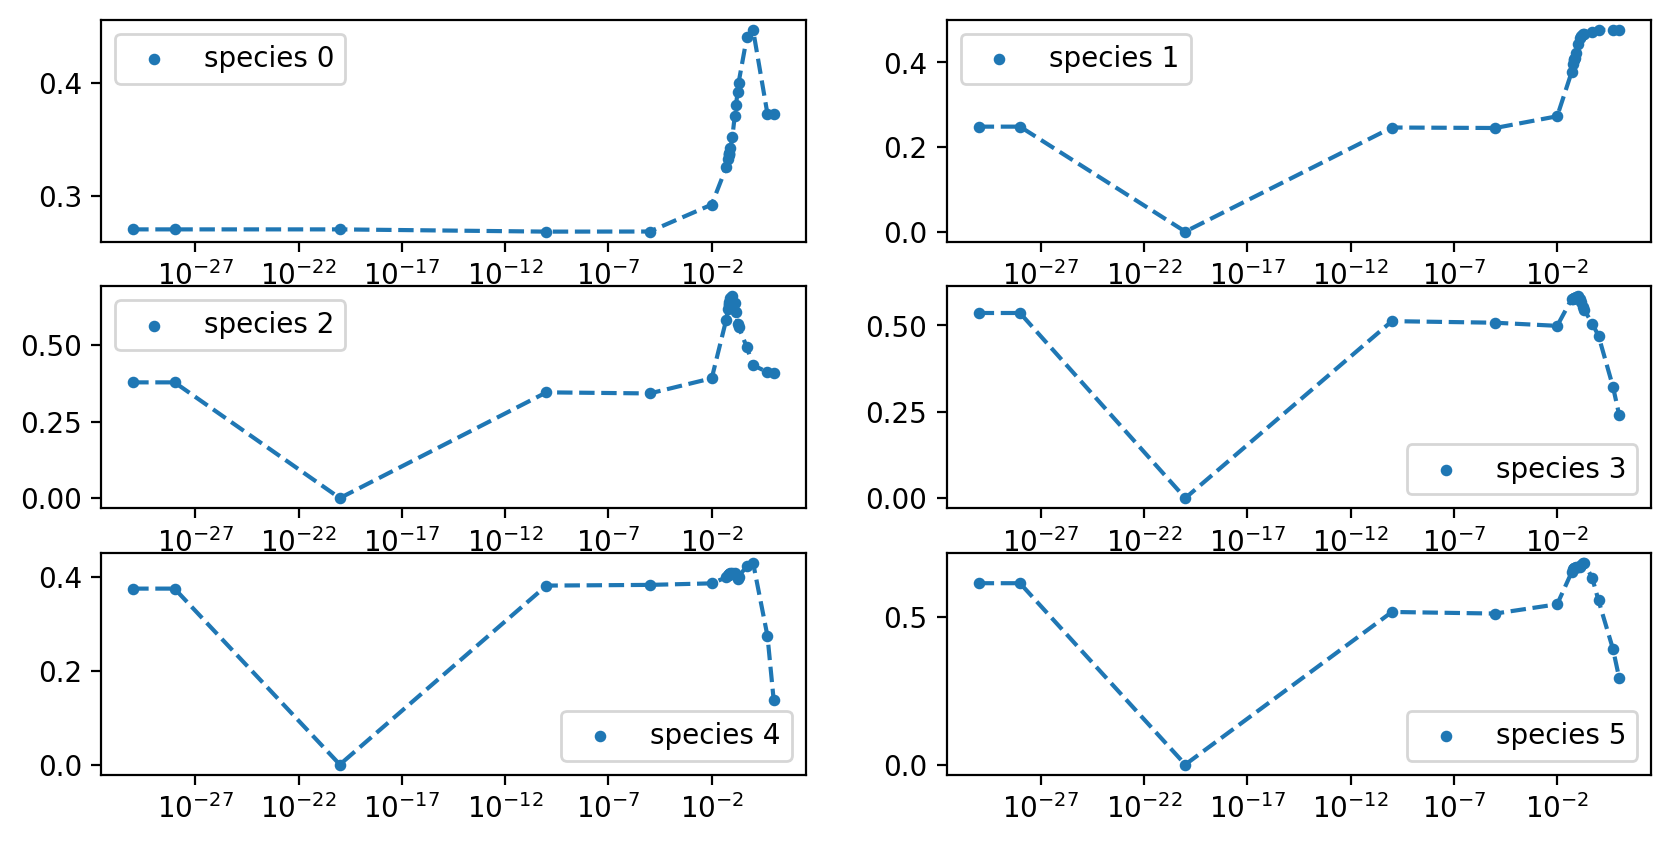

In [23]:
fig,ax = plt.subplots(3,2,figsize=(10,5),dpi=200)

for species in range(6):
    plt.subplot(3,2,species+1)
    spper = crosslindf[crosslindf["sp"]==species]
    kdf = spper[spper["k-fold"]==3]
    plt.scatter(kdf["lambda"],kdf["nnseagg"],s=10,label="species " + str(species))
    plt.plot(kdf["lambda"],kdf["nnseagg"],ls="dashed")
    plt.legend()
    plt.xscale("log")

In [24]:
bestlindf

,0,1,2,3
0,0,3,0.446689,1.0000
1,1,3,0.476713,1.0000
2,2,3,0.659701,0.1000
3,3,3,0.584346,0.1000
4,4,3,0.430332,1.0000
5,5,3,0.684317,0.2000
6,0,5,0.477491,0.5000
7,1,5,0.477492,1.0000
8,2,5,0.596914,0.0800
9,3,5,0.589066,0.0800


In [26]:
h.to_pickle("SS-l1-cs.pkl")